In [1]:
## Silhouette Score, Davies-Bouldin Index, Calinski-Harabasz Index

import os
os.environ["OMP_NUM_THREADS"] = "2"
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score 
import numpy as np

#Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=1, random_state=42)

#Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)

#Compute intrinsic metrics
sil_score = silhouette_score(X, labels) 
db_score = davies_bouldin_score(X, labels) 
ch_score = calinski_harabasz_score(X, labels)

print(f"Silhouette Score: {sil_score:.3f}") 
print(f"Davies-Bouldin Index: {db_score:.3f}") 
print(f"Calinski-Harabasz Index: {ch_score:.3f}")


In [3]:
## Coherence Scores
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
import numpy as np

# Sample tokenized documents
documents = [["cat", "dog", "pet"], ["cat", "kitten", "cow"], ["cat", "kitten", "pet"]]
dictionary = Dictionary(documents)
corpus = [dictionary.doc2bow(doc) for doc in documents]

# Train LDA model
lda = LdaModel(corpus, num_topics=2, id2word=dictionary, random_state=42)

# Compute C_v coherence
coherence_model = CoherenceModel(model=lda, texts=documents, 
                                 dictionary=dictionary, coherence='c_v')
coherence_score = coherence_model.get_coherence()
print(f"C_v Coherence Score: {coherence_score:.3f}")

C_v Coherence Score: 0.226


In [4]:
# Perplexity
from gensim.models import LdaModel
from gensim.corpora import Dictionary
import numpy as np

# Sample tokenized documents (split into training and test sets)
train_documents = [
    ["cat", "dog", "pet", "animal"],
    ["car", "truck", "vehicle", "road"],
    ["cat", "kitten", "pet", "furry"],
    ["car", "bike", "vehicle", "transport"]
]
test_documents = [
    ["dog", "pet", "animal"],
    ["car", "vehicle", "road"]
]

# Create dictionary and corpus for training
dictionary = Dictionary(train_documents)
train_corpus = [dictionary.doc2bow(doc) for doc in train_documents]
test_corpus = [dictionary.doc2bow(doc) for doc in test_documents]

# Train LDA model
lda = LdaModel(corpus=train_corpus, num_topics=2, id2word=dictionary, random_state=42, passes=10)

# Compute perplexity on test corpus
log_perplexity = lda.log_perplexity(test_corpus)
perplexity = np.exp(-log_perplexity)  # Convert log perplexity to perplexity
print(f"Perplexity: {perplexity:.3f}")

Perplexity: 40.039


In [5]:
## Explained Variance Ratio
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
import numpy as np

# Generate synthetic data
X, _ = make_classification(n_samples=200, n_features=10, n_informative=5, random_state=42)

# Apply PCA
pca = PCA(n_components=2)
X_transformed = pca.fit_transform(X)

# Compute explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance}")
print(f"Total Variance Explained: {np.sum(explained_variance):.3f}")

Explained Variance Ratio: [0.31659442 0.22280016]
Total Variance Explained: 0.539


In [3]:
#Extrinsic Evaluation of K-Means Clustering Algorithm using Classification Task
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load the Telco Customer Churn dataset
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
# Preprocess: Handle missing values and convert 'TotalCharges' to numeric
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"], errors="coerce")
data["TotalCharges"] = data["TotalCharges"].fillna(data["TotalCharges"].median())

# Map 'Churn' to 'churn_label' (Yes=1, No=0)
data["churn_label"] = data["Churn"].map({"Yes": 1, "No": 0})

# Define features (X) and target (y)
X = data.drop(columns=["Churn", "churn_label", "customerID"])
y = data["churn_label"]

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=["object"]).columns
numerical_cols = X.select_dtypes(exclude=["object"]).columns

# Preprocessing pipeline: Scale numerical, encode categorical
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols),
        ("cat", OneHotEncoder(drop="first", sparse_output=False), categorical_cols)])
X_preprocessed4864 = preprocessor.fit_transform(X)

# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_preprocessed4864)

# Add cluster labels as a feature
X_with_clusters = np.hstack([X_preprocessed4864, clusters.reshape(-1, 1)])

# Train logistic regression on cluster-enhanced features
clf = LogisticRegression(random_state=42, max_iter=1000)
clf.fit(X_with_clusters, y)

# Evaluate performance
y_pred = clf.predict(X_with_clusters)
accuracy = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)

print(f"Accuracy: {accuracy:.3f}")
print(f"F1-Score: {f1:.3f}")

Accuracy: 0.807
F1-Score: 0.604


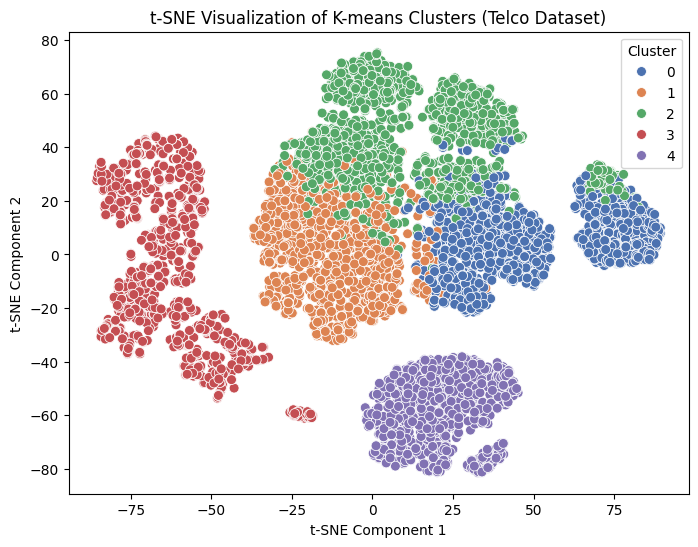

In [8]:
#Qualitative Visualization Techniques
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Load Telco Customer Churn dataset
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
data = data.dropna()
X = data.drop(columns=["Churn", "customerID"])  # Features for clustering

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=["object"]).columns
numerical_cols = X.select_dtypes(exclude=["object"]).columns

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols),
        ("cat", OneHotEncoder(drop="first", sparse_output=False), categorical_cols)
    ]
)
X_preprocessed = preprocessor.fit_transform(X)

# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_preprocessed)

# Visualize clusters using t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_preprocessed)

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=clusters, palette="deep", s=50)
plt.title("t-SNE Visualization of K-means Clusters (Telco Dataset)")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(title="Cluster")
plt.show()

Mean ARI: 0.840
Standard Deviation of ARI: 0.169


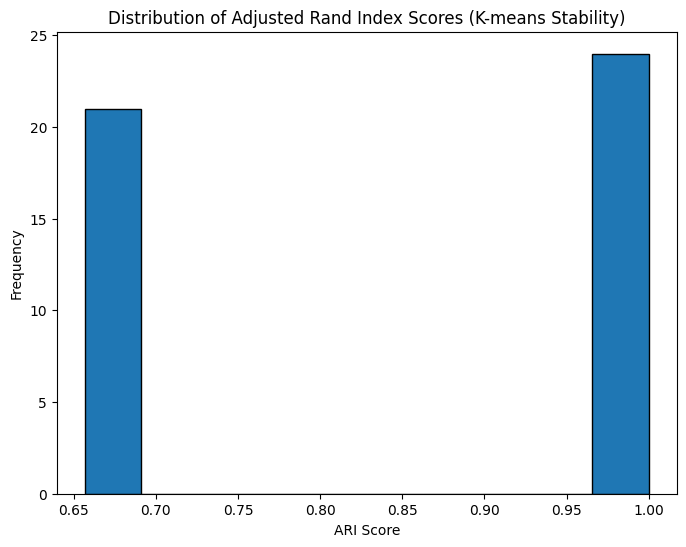

In [9]:
# Stability Analysis
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
# Load Telco Customer Churn dataset
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
data = data.dropna()
X = data.drop(columns=["Churn", "customerID"])  # Features
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=["object"]).columns
numerical_cols = X.select_dtypes(exclude=["object"]).columns
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols),
        ("cat", OneHotEncoder(drop="first", sparse_output=False), categorical_cols)])
X_preprocessed = preprocessor.fit_transform(X)
# Stability analysis: Run K-means multiple times
n_runs = 10
n_clusters = 5
cluster_labels = []
for i in range(n_runs):
    kmeans = KMeans(n_clusters=n_clusters, random_state=i)
    labels = kmeans.fit_predict(X_preprocessed)
    cluster_labels.append(labels)
# Compute pairwise Adjusted Rand Index (ARI)
ari_scores = []
for i in range(n_runs):
    for j in range(i + 1, n_runs):
        ari = adjusted_rand_score(cluster_labels[i], cluster_labels[j])
        ari_scores.append(ari)
# Summarize stability
mean_ari = np.mean(ari_scores)
std_ari = np.std(ari_scores)
print(f"Mean ARI: {mean_ari:.3f}")
print(f"Standard Deviation of ARI: {std_ari:.3f}")

# Visualize ARI scores
plt.figure(figsize=(8, 6))
plt.hist(ari_scores, bins=10, edgecolor="black")
plt.title("Distribution of Adjusted Rand Index Scores (K-means Stability)")
plt.xlabel("ARI Score")
plt.ylabel("Frequency")
plt.show()